In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Cargar los datasets
url_sales = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv'
url_ironkaggle = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv'

data_ventas = pd.read_csv(url_sales)
data_ironkaggle = pd.read_csv(url_ironkaggle)

# Combinar los datasets
data_ventas = pd.concat([data_ventas, data_ironkaggle], ignore_index=True)

# Asegurarse de que 'Sales' esté presente
if 'Sales' not in data_ventas.columns:
    print("Error: La columna 'Sales' no está en el DataFrame combinado.")
else:
    print("La columna 'Sales' está presente en el DataFrame combinado.")

# Eliminar filas con valores NaN en 'Sales'
data_ventas = data_ventas.dropna(subset=['Sales'])

# Verificar nuevamente
if 'Sales' in data_ventas.columns:
    print("\nLa columna 'Sales' sigue presente después de las transformaciones.")
else:
    print("\nLa columna 'Sales' NO está presente después de las transformaciones.")

# Dividir los datos en características (X) y variable objetivo (y)
X = data_ventas.drop(columns=['Sales'])  # 'Sales' es la variable objetivo
y = data_ventas['Sales']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos que la columna 'Sales' esté en y_train
print("\n¿La columna 'Sales' está en y_train?:", 'Sales' in y_train.index)

# Para verificar que 'y_train' contiene los datos correctos
print("\nValores de y_train (sin NaN):")
print(y_train.head())




La columna 'Sales' está presente en el DataFrame combinado.

La columna 'Sales' sigue presente después de las transformaciones.

¿La columna 'Sales' está en y_train?: False

Valores de y_train (sin NaN):
360184    6860.0
162306    4850.0
80802     6293.0
607893    9541.0
606656    5741.0
Name: Sales, dtype: float64


In [3]:
data_ventas.dtypes

True_index               int64
Store_ID                 int64
Day_of_week              int64
Date                    object
Nb_customers_on_day      int64
Open                     int64
Promotion                int64
State_holiday           object
School_holiday           int64
Sales                  float64
dtype: object

In [4]:
# Transformar variables categóricas
data_ventas = pd.get_dummies(data_ventas, columns=['Day_of_week', 'State_holiday', 'School_holiday'], drop_first=True)

# Eliminamos la columna 'Date' del dataframe original antes de la división
data_ventas = data_ventas.drop(columns=['Date'])

# Dividimos los datos en características (X) y variable objetivo (y)
X = data_ventas.drop(columns=['Sales'])  # 'Sales' es la variable objetivo
y = data_ventas['Sales']

# División en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos que la columna 'Date' no esté en X_train
print(X_train.dtypes)

True_index             int64
Store_ID               int64
Nb_customers_on_day    int64
Open                   int64
Promotion              int64
Day_of_week_2           bool
Day_of_week_3           bool
Day_of_week_4           bool
Day_of_week_5           bool
Day_of_week_6           bool
Day_of_week_7           bool
State_holiday_a         bool
State_holiday_b         bool
State_holiday_c         bool
School_holiday_1        bool
dtype: object


In [5]:
data_ventas.dtypes

True_index               int64
Store_ID                 int64
Nb_customers_on_day      int64
Open                     int64
Promotion                int64
Sales                  float64
Day_of_week_2             bool
Day_of_week_3             bool
Day_of_week_4             bool
Day_of_week_5             bool
Day_of_week_6             bool
Day_of_week_7             bool
State_holiday_a           bool
State_holiday_b           bool
State_holiday_c           bool
School_holiday_1          bool
dtype: object

In [6]:
print(X_train.dtypes)

True_index             int64
Store_ID               int64
Nb_customers_on_day    int64
Open                   int64
Promotion              int64
Day_of_week_2           bool
Day_of_week_3           bool
Day_of_week_4           bool
Day_of_week_5           bool
Day_of_week_6           bool
Day_of_week_7           bool
State_holiday_a         bool
State_holiday_b         bool
State_holiday_c         bool
School_holiday_1        bool
dtype: object


In [7]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de test
y_pred = model.predict(X_test)

In [8]:
# Calcular R2, MAE, y MSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

R²: 0.8568510127663367
MAE: 974.8105705879465
MSE: 2155110.2875035377


In [9]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    # Entrenamos el modelo
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    
    # Cálculo de métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2, mae, mse

# Lista de modelos a comparar
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Comparar los modelos
resultados = {}

for nombre, modelo in modelos.items():
    r2, mae, mse = evaluar_modelo(modelo, X_train, y_train, X_test, y_test)
    resultados[nombre] = {'R²': r2, 'MAE': mae, 'MSE': mse}

# Mostrar los resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


                         R²         MAE           MSE
Regresión Lineal   0.856851  974.810571  2.155110e+06
Árbol de Decisión  0.922061  598.752192  1.173374e+06
Random Forest      0.953658  495.010775  6.976787e+05
Gradient Boosting  0.881497  891.708779  1.784065e+06


C:\Users\Carlos\AppData\Local\Temp\ipykernel_16624\2652315939.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados_df.index, y='R²', data=resultados_df, palette='viridis')
C:\Users\Carlos\AppData\Local\Temp\ipykernel_16624\2652315939.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados_df.index, y='MAE', data=resultados_df, palette='viridis')
C:\Users\Carlos\AppData\Local\Temp\ipykernel_16624\2652315939.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados_df.index, y='MSE', data=resultados_df, palette='

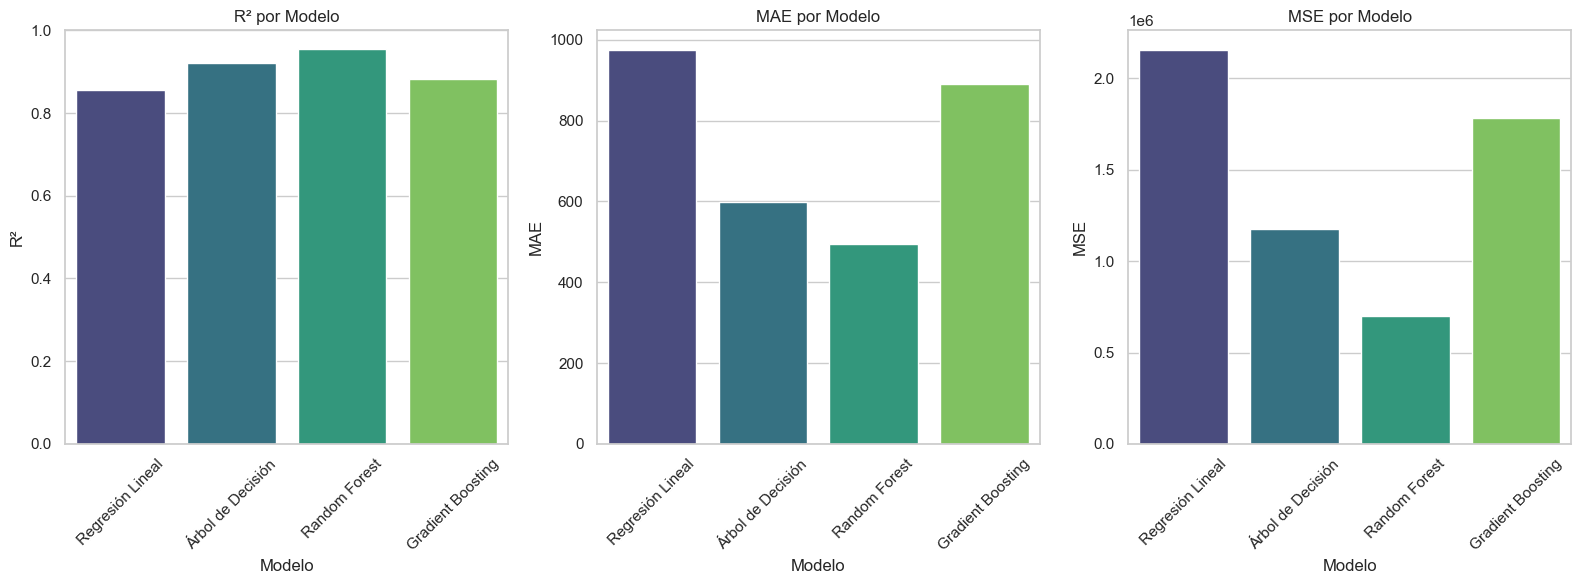

<Figure size 640x480 with 0 Axes>

In [10]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear un DataFrame a partir de los resultados
resultados_df = pd.DataFrame(resultados).T

# Crear una figura y ejes
plt.figure(figsize=(16, 6))


# Graficar R²
plt.subplot(1, 3, 1)
sns.barplot(x=resultados_df.index, y='R²', data=resultados_df, palette='viridis')
plt.title('R² por Modelo')
plt.ylim(0, 1)
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x

# Graficar MAE
plt.subplot(1, 3, 2)
sns.barplot(x=resultados_df.index, y='MAE', data=resultados_df, palette='viridis')
plt.title('MAE por Modelo')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x

# Graficar MSE
plt.subplot(1, 3, 3)
sns.barplot(x=resultados_df.index, y='MSE', data=resultados_df, palette='viridis')
plt.title('MSE por Modelo')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()


# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()
